# <div style="text-align:center; border-radius:30px 30px; padding:13px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#1c4f9e; overflow:hidden"><b>Credit Card Customer Segmentation</b></div>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

## 1. <u> Introduction </u>


In modern banking and financial services, a deep understanding of customer behavior has become crucial for developing effective marketing strategies. This project focuses on analyzing and segmenting a database of approximately 9,000 active credit card holders, tracked over a 6-month period, using a dataset sourced from Kaggle.

The main objective is to identify distinct customer segments using their credit card usage behaviors, through 18 key behavioral variables including account balances, purchase frequencies, cash advances, and credit limits. This segmentation will enable:

1. Identification of specific customer profiles
2. Understanding credit card usage patterns
3. Development of personalized marketing strategies for each segment
4. Optimization of financial products and services offerings

Through the use of unsupervised machine learning techniques, we aim to create meaningful classifications that will serve as a foundation for strategic marketing decisions and improved customer experience.

The dataset, available on Kaggle's platform, provides comprehensive information about customers' financial behaviors, including their purchasing patterns, credit utilization, and payment habits. This rich data will allow us to develop sophisticated clustering models that can reveal natural groupings within our customer base.

## 2. <u> Data Exploration and Preparation </u>

In [3]:
df = pd.read_csv('Dataset/credit_card.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [7]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.shape

(8950, 18)

In [27]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [24]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [35]:
#Delete Id columns
df = df.drop('CUST_ID', axis=1)

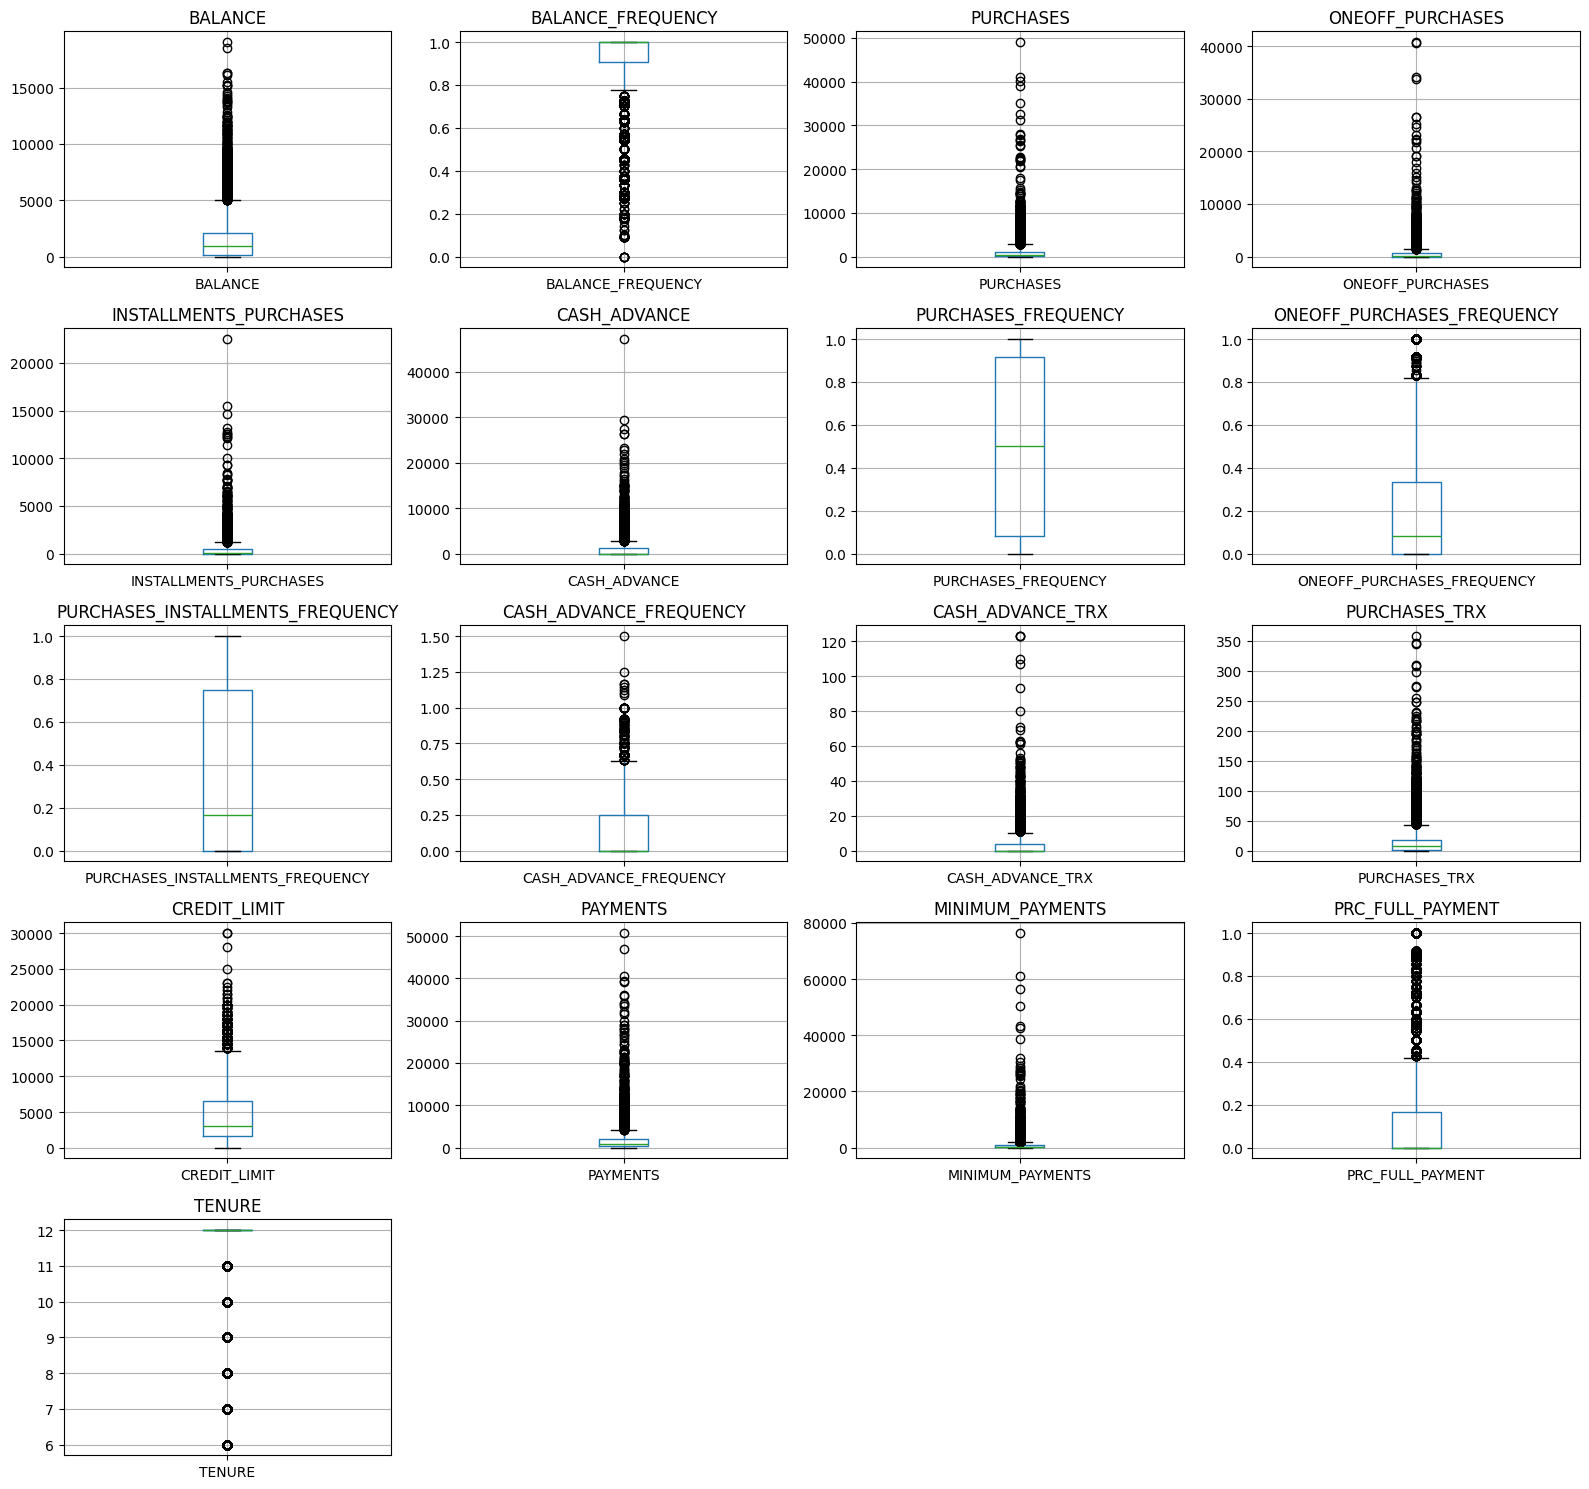

In [37]:
#Display outliers values
fig, axes = plt.subplots(5, 4, figsize=(16, 15))  
axes = axes.flatten()  

for i, col in enumerate(df.columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_title(col)

# Supprimer les axes inutilisés
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## <u> 3. Data Preprocessing </u>

In [ ]:
### <u> 2.1 Handle missing values </u>

In [25]:
#Remove rows with missing values.
df = df.dropna(subset =['MINIMUM_PAYMENTS', 'CREDIT_LIMIT'])

In [ ]:
### <u> 2.2 Standardisation </u>

Our dataframe contains a large number of outliers, which can distort the results of standard scaling methods. Therefore, we use the RobustScaler to scale the data based on the median and interquartile range, making it more robust to extreme values.

In [45]:
#Normalize the data
df_scaled = df.copy()
robust_scaler = RobustScaler()
df_robust = pd.DataFrame(df_robust, columns=df.columns)

In [46]:
df_robust

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.447578,-2.000000,-0.253947,-0.075104,0.001270,0.000000,-0.399999,-0.249999,-0.111112,0.000000,0.0,-0.294118,-0.408163,-0.453400,-0.263498,0.000000,0.0
1,1.167856,-1.000000,-0.340469,-0.075104,-0.195777,5.689710,-0.600000,-0.249999,-0.222223,1.000000,1.0,-0.411765,0.816327,2.092126,1.157778,1.333329,0.0
2,0.806445,0.000000,0.360748,1.215448,-0.195777,0.000000,0.600000,2.750004,-0.222223,0.000000,0.0,0.294118,0.918367,-0.179180,0.479684,0.000000,0.0
3,-0.050657,0.000000,-0.325958,-0.048398,-0.195777,0.000000,-0.500000,0.000000,-0.222223,0.000000,0.0,-0.352941,-0.367347,-0.142466,-0.103090,0.000000,0.0
4,0.456274,0.000000,0.868732,-0.075104,2.558094,0.000000,0.200000,-0.249999,0.555555,0.000000,0.0,0.058824,-0.244898,0.328453,3.191663,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,-0.465476,-5.500006,-0.321514,-0.040219,-0.195777,0.000000,-0.399999,0.250002,-0.222223,0.000000,0.0,-0.352941,-0.510204,-0.546809,-0.409820,0.000000,-6.0
8632,-0.453917,0.000000,-0.076441,-0.075104,0.405527,0.000000,0.600000,-0.249999,0.888888,0.000000,0.0,-0.058824,-0.408163,-0.372627,-0.401574,2.999994,-6.0
8633,-0.456521,-1.833339,-0.209507,-0.075104,0.102479,0.000000,0.399999,-0.249999,0.666667,0.000000,0.0,-0.117647,-0.408163,-0.532046,-0.350484,1.499997,-6.0
8634,-0.461600,-1.833339,-0.340469,-0.075104,-0.195777,0.032285,-0.600000,-0.249999,-0.222223,0.666668,0.5,-0.411765,-0.510204,-0.550786,-0.391107,1.499997,-6.0


In [48]:
df_robust.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8.636000e+03,8.636000e+03,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,0.349685,-1.154615,5.895352e-01,9.345793e-01,0.673469,0.877948,-0.004800,0.367728,0.269538,0.550417,0.828480,0.472543,0.310631,0.579285,0.840812,0.955820,-0.465609
std,1.070753,2.284668,1.965430e+00,2.811397e+00,1.894557,1.873442,0.481527,0.900162,0.530791,0.807166,1.728127,1.481204,0.746784,1.898632,3.614882,1.777622,1.310984
min,-0.468476,-11.000011,-3.404687e-01,-7.510432e-02,-0.195777,0.000000,-0.600000,-0.249999,-0.222223,0.000000,0.000000,-0.411765,-0.602041,-0.585043,-0.476028,0.000000,-6.000000
25%,-0.392806,-1.000000,-3.011371e-01,-7.510432e-02,-0.195777,0.000000,-0.500000,-0.249999,-0.222223,0.000000,0.000000,-0.352941,-0.285714,-0.311968,-0.218317,0.000000,0.000000
50%,0.000000,0.000000,2.577691e-17,-5.930925e-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.607194,0.000000,6.988629e-01,9.248957e-01,0.804223,1.000000,0.500000,0.750001,0.777777,1.000000,1.000000,0.647059,0.714286,0.688032,0.781683,1.000000,0.000000
max,9.261804,0.000000,4.413533e+01,6.796237e+01,46.277663,41.626471,0.600000,2.750004,1.111111,6.000000,30.750000,20.647059,5.510204,32.510352,115.937740,5.999988,0.000000


## <u> 4. PCA Reduction </u>

In [68]:
#Applying PCA
pca = PCA(n_components=0.90)
robust_pca = pca.fit_transform(df_robust)

In [69]:
#Calculate the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

In [70]:
print(f"Variance explained by each component: {explained_variance}")

Variance explained by each component: [0.30165888 0.23988679 0.1266575  0.09518433 0.06415898 0.04688198
 0.0329426 ]


In [71]:
print(f"Total variance explained by 95%: {sum(explained_variance)}")


Total variance explained by 95%: 0.9073710551562774


In [72]:
print(f"Number of principal components required to explain 95% of the variance: {len(explained_variance)}")


Number of principal components required to explain 95% of the variance: 7


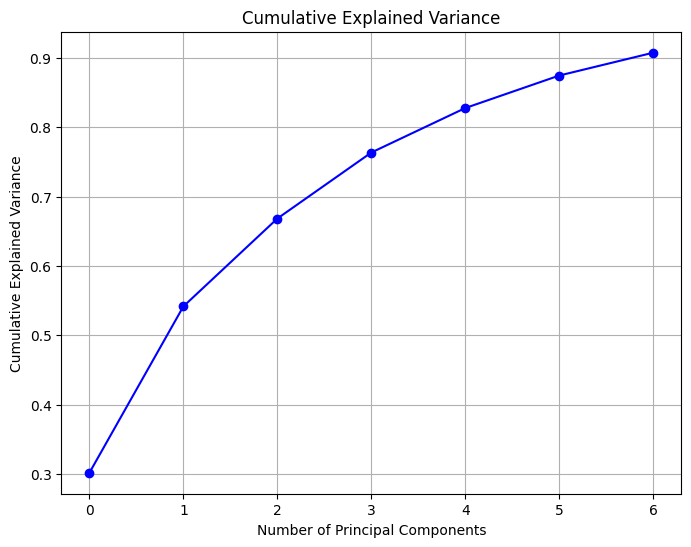

In [73]:
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', color='b')
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

## <u> 5.Building model </u>

### <u>  5.1 Find best Hyperparameters </u>

In [81]:
# Step 1: Search for the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 30):  
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(robust_pca)
    inertia.append(kmeans.inertia_)

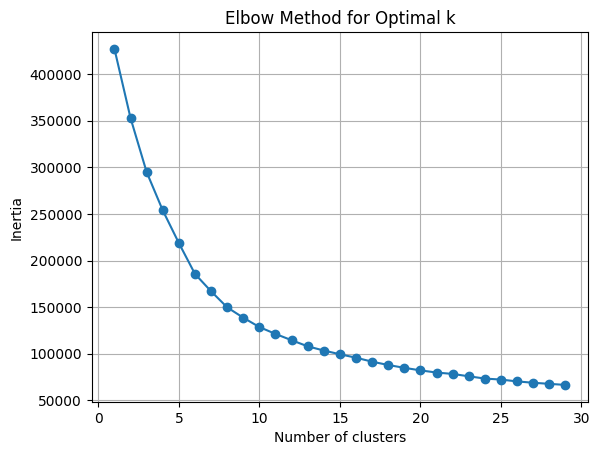

In [82]:
# Plotting the Elbow Method
plt.plot(range(1, 30), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

At a glance, I would say that the optimal number of clusters is 15.

### <u> 5.2 Build K-Means </u>

In [99]:
#Instantiate model
model = KMeans(n_clusters= 15, random_state=42, n_init=10)

In [102]:
model.fit(robust_pca)

KMeans(n_clusters=15, n_init=10, random_state=42)

In [104]:
results = model.predict(robust_pca)

In [107]:
# Print the 10 first results
print("Cluster labels for the first 10 samples:")
print(results[:10])

Cluster labels for the first 10 samples:
[ 1  7  1  1 12  8  1  1 11  1]
